In [1]:
import numpy as np
import pandas as pd
from numpy import abs
from numpy import log
from numpy import sign
from scipy.stats import rankdata

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
import csf_kit

/Users/miaoyuesun/anaconda3/lib/python3.5/site-packages/numpy/lib/arraysetops.py:571: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [20]:
csf_kit.prepare_data_for_alphalens

<function csf_kit.news.util.prepare_data_for_alphalens(fac_data, price_data=None, filter_list_days=0, groupby=None, binning_by_group=False, quantiles=None, bins=10, periods=(1, 5, 10), filter_zscore=None, groupby_labels=None, max_loss=3, zero_aware=False, cumulative_returns=True)>

In [3]:
sample = csf_kit.SAMPLE_SENTI_SCORE

In [10]:
sample.head(2)

,news_id,news_time,sec_code,senti_type,senti_weight,relevance,senti_score,trade_date,senti_score_rel,decay_factor
0,484167,2017-01-01,000651.XSHE,1,0.86,0.2609,86.0,2017-01-03,22.4374,0.518793
1,484167,2017-01-01,000012.XSHE,1,0.85,0.2609,85.0,2017-01-03,22.1765,0.518793


In [13]:
sample.groupby(['news_time','sec_code'])['decay_factor'].mean()

news_time            sec_code   
2017-01-01 00:00:00  000002.XSHE    0.518793
                     000012.XSHE    0.518793
                     000651.XSHE    0.518793
                     600887.XSHG    0.518793
                     601668.XSHG    0.518793
2017-01-01 00:06:00  601998.XSHG    0.519334
2017-01-01 00:10:00  000039.XSHE    0.519695
                     000651.XSHE    0.519695
                     002594.XSHE    0.519695
2017-01-01 00:22:00  002364.XSHE    0.520778
                     002660.XSHE    0.520778
                     300582.XSHE    0.520778
                     600628.XSHG    0.520778
2017-01-01 00:23:00  000651.XSHE    0.520869
                     002739.XSHE    0.520869
                     600058.XSHG    0.520869
                     600390.XSHG    0.520869
                     600660.XSHG    0.520869
2017-01-01 00:30:00  002594.XSHE    0.521502
2017-01-01 00:45:00  600628.XSHG    0.522862
2017-01-01 01:43:00  002568.XSHE    0.528154
2017-01-01 02:40:00  0

In [12]:
j = pd.read_csv("j9000.csv", header = None).head(5)
# jd = pd.read_csv("jd000_d.csv", header = None).head(5)
jm = pd.read_csv("jm000.csv", header = None).head(5)

In [13]:
j['asset'] = "j9000"
# jd['asset'] = "jd000"
jm['asset'] = "jm000"
df = pd.concat([j, jm])
df.head(2)

,0,1,2,3,4,5,6,asset
0,2011/04/15 09:00,2275.0,2285.0,2250.0,2260.0,31834,6134,j9000
1,2011/04/15 10:00,2259.0,2265.0,2252.0,2256.0,6440,6184,j9000


In [14]:
df.columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume', 'open_int', 'asset']

In [16]:
df[['timestamp', 'asset','open', 'high', 'low', 'close', 'volume', 'open_int']]

,timestamp,asset,open,high,low,close,volume,open_int
0,2011/04/15 09:00,j9000,2275.0,2285.0,2250.0,2260.0,31834,6134
1,2011/04/15 10:00,j9000,2259.0,2265.0,2252.0,2256.0,6440,6184
2,2011/04/15 11:00,j9000,2256.0,2258.0,2228.0,2248.0,8264,6786
3,2011/04/15 13:00,j9000,2246.0,2251.0,2238.0,2240.0,4832,7534
4,2011/04/15 14:00,j9000,2241.0,2252.0,2239.0,2250.0,6710,6694
0,2013/03/22 09:00,jm000,1277.0,1305.0,1258.0,1287.0,436888,94546
1,2013/03/22 10:00,jm000,1287.0,1287.0,1277.0,1281.0,80480,100158
2,2013/03/22 11:00,jm000,1280.0,1282.0,1268.0,1270.0,78884,107526
3,2013/03/22 13:00,jm000,1269.0,1272.0,1264.0,1270.0,60800,115156
4,2013/03/22 14:00,jm000,1270.0,1282.0,1263.0,1268.0,191864,97386


In [6]:
len(df)

24404

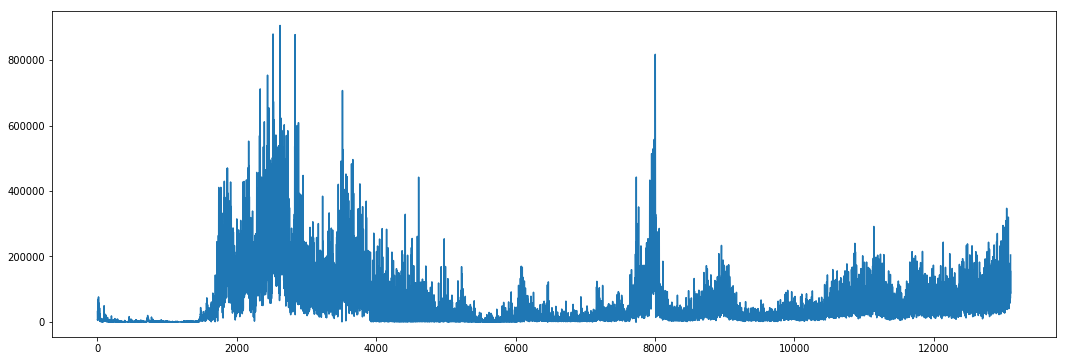

In [26]:
j_ = df[df['asset']=='j']
j_['volume'].plot(figsize = (18,6))

In [31]:
jm_ = df[df['asset']=='jm']

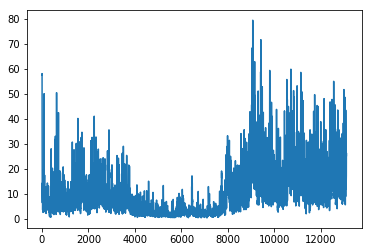

In [30]:
stddev((df[df['asset']=='j']))['close'].plot()

In [32]:
x = j_['close']
y = jm_['close']

In [33]:
corr = correlation(x, y)

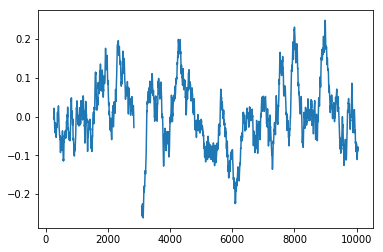

In [40]:
sma(corr, 252).plot()

In [43]:
np.zeros_like(j_)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=object)

In [18]:
# region Auxiliary functions
# 1
def ts_sum(df, window=10):
    """
    Wrapper function to estimate rolling sum.
    :param df: a pandas DataFrame.
    :param window: the rolling window.
    :return: a pandas DataFrame with the time-series min over the past 'window' days.
    """
    return df.rolling(window).sum()

# 2
def sma(df, window=10):
    """
    Wrapper function to estimate SMA.
    :param df: a pandas DataFrame.
    :param window: the rolling window.
    :return: a pandas DataFrame with the time-series min over the past 'window' days.
    """
    return df.rolling(window).mean()

# 3
def stddev(df, window=10):
    """
    Wrapper function to estimate rolling standard deviation.
    :param df: a pandas DataFrame.
    :param window: the rolling window.
    :return: a pandas DataFrame with the time-series min over the past 'window' days.
    """
    return df.rolling(window).std()

# 4
def correlation(x, y, window=10):
    """
    Wrapper function to estimate rolling corelations.
    :param df: a pandas DataFrame.
    :param window: the rolling window.
    :return: a pandas DataFrame with the time-series min over the past 'window' days.
    """
    return x.rolling(window).corr(y)

# 5
def covariance(x, y, window=10):
    """
    Wrapper function to estimate rolling covariance.
    :param df: a pandas DataFrame.
    :param window: the rolling window.
    :return: a pandas DataFrame with the time-series min over the past 'window' days.
    """
    return x.rolling(window).cov(y)

# 6
def rolling_rank(na):
    """
    Auxiliary function to be used in pd.rolling_apply
    :param na: numpy array.
    :return: The rank of the last value in the array.
    """
    return rankdata(na)[-1]

# 7
def ts_rank(df, window=10):
    """
    Wrapper function to estimate rolling rank.
    :param df: a pandas DataFrame.
    :param window: the rolling window.
    :return: a pandas DataFrame with the time-series rank over the past window days.
    """
    return df.rolling(window).apply(rolling_rank)

# 8
def rolling_prod(na):
    """
    Auxiliary function to be used in pd.rolling_apply
    :param na: numpy array.
    :return: The product of the values in the array.
    """
    return np.prod(na)

# 9
def product(df, window=10):
    """
    Wrapper function to estimate rolling product.
    :param df: a pandas DataFrame.
    :param window: the rolling window.
    :return: a pandas DataFrame with the time-series product over the past 'window' days.
    """
    return df.rolling(window).apply(rolling_prod)

# 10
def ts_min(df, window=10):
    """
    Wrapper function to estimate rolling min.
    :param df: a pandas DataFrame.
    :param window: the rolling window.
    :return: a pandas DataFrame with the time-series min over the past 'window' days.
    """
    return df.rolling(window).min()

# 11
def ts_max(df, window=10):
    """
    Wrapper function to estimate rolling min.
    :param df: a pandas DataFrame.
    :param window: the rolling window.
    :return: a pandas DataFrame with the time-series max over the past 'window' days.
    """
    return df.rolling(window).max()

# 12
def delta(df, period=1):
    """
    Wrapper function to estimate difference.
    :param df: a pandas DataFrame.
    :param period: the difference grade.
    :return: a pandas DataFrame with today’s value minus the value 'period' days ago.
    """
    return df.diff(period)

# 13
def delay(df, period=1):
    """
    Wrapper function to estimate lag.
    :param df: a pandas DataFrame.
    :param period: the lag grade.
    :return: a pandas DataFrame with lagged time series
    """
    return df.shift(period)

# 14
def rank(df):
    """
    Cross sectional rank
    :param df: a pandas DataFrame.
    :return: a pandas DataFrame with rank along columns.
    """
    #return df.rank(axis=1, pct=True)
    return df.rank(pct=True)

# 15
def scale(df, k=1):
    """
    Scaling time serie.
    :param df: a pandas DataFrame.
    :param k: scaling factor.
    :return: a pandas DataFrame rescaled df such that sum(abs(df)) = k
    """
    return df.mul(k).div(np.abs(df).sum())

# 16
def ts_argmax(df, window=10):
    """
    Wrapper function to estimate which day ts_max(df, window) occurred on
    :param df: a pandas DataFrame.
    :param window: the rolling window.
    :return: well.. that :)
    """
    return df.rolling(window).apply(np.argmax) + 1 

# 17
def ts_argmin(df, window=10):
    """
    Wrapper function to estimate which day ts_min(df, window) occurred on
    :param df: a pandas DataFrame.
    :param window: the rolling window.
    :return: well.. that :)
    """
    return df.rolling(window).apply(np.argmin) + 1

# 18
def decay_linear(df, period=10):
    """
    Linear weighted moving average implementation.
    :param df: a pandas DataFrame.
    :param period: the LWMA period
    :return: a pandas DataFrame with the LWMA.
    """
    # Clean data
    if df.isnull().values.any():
        df.fillna(method='ffill', inplace=True)
        df.fillna(method='bfill', inplace=True)
        df.fillna(value=0, inplace=True)
    na_lwma = np.zeros_like(df)
    na_lwma[:period, :] = df.iloc[:period, :] 
    na_series = df.as_matrix()

    divisor = period * (period + 1) / 2
    y = (np.arange(period) + 1) * 1.0 / divisor
    # Estimate the actual lwma with the actual close.
    # The backtest engine should assure to be snooping bias free.
    for row in range(period - 1, df.shape[0]):
        x = na_series[row - period + 1: row + 1, :]
        na_lwma[row, :] = (np.dot(x.T, y))
    return pd.DataFrame(na_lwma, index=df.index, columns=['CLOSE'])  
    # endregion

def get_alpha(df):
    stock=Alphas(df)
    df['alpha001']=stock.alpha001() 
    df['alpha002']=stock.alpha002()
    df['alpha003']=stock.alpha003()
    df['alpha004']=stock.alpha004()
    df['alpha005']=stock.alpha005()
    df['alpha006']=stock.alpha006()
    df['alpha007']=stock.alpha007()
    df['alpha008']=stock.alpha008()
    df['alpha009']=stock.alpha009()
    df['alpha010']=stock.alpha010()
    df['alpha011']=stock.alpha011()
    df['alpha012']=stock.alpha012()
    df['alpha013']=stock.alpha013()
    df['alpha014']=stock.alpha014()
    df['alpha015']=stock.alpha015()
    df['alpha016']=stock.alpha016()
    df['alpha017']=stock.alpha017()
    df['alpha018']=stock.alpha018()
    df['alpha019']=stock.alpha019()
    df['alpha020']=stock.alpha020()
    df['alpha021']=stock.alpha021()
    df['alpha022']=stock.alpha022()
    df['alpha023']=stock.alpha023()
    df['alpha024']=stock.alpha024()
    df['alpha025']=stock.alpha025()
    df['alpha026']=stock.alpha026()
    df['alpha027']=stock.alpha027()
    df['alpha028']=stock.alpha028()
    df['alpha029']=stock.alpha029()
    df['alpha030']=stock.alpha030()
    df['alpha031']=stock.alpha031()
    df['alpha032']=stock.alpha032()
    df['alpha033']=stock.alpha033()
    df['alpha034']=stock.alpha034()
    df['alpha035']=stock.alpha035()
    df['alpha036']=stock.alpha036()
    df['alpha037']=stock.alpha037()
    df['alpha038']=stock.alpha038()
    df['alpha039']=stock.alpha039()
    df['alpha040']=stock.alpha040()
    df['alpha041']=stock.alpha041()
    df['alpha042']=stock.alpha042()
    df['alpha043']=stock.alpha043()
    df['alpha044']=stock.alpha044()
    df['alpha045']=stock.alpha045()
    df['alpha046']=stock.alpha046()
    df['alpha047']=stock.alpha047()
    df['alpha049']=stock.alpha049()
    df['alpha050']=stock.alpha050()
    df['alpha051']=stock.alpha051()
    df['alpha052']=stock.alpha052()
    df['alpha053']=stock.alpha053()
    df['alpha054']=stock.alpha054()
    df['alpha055']=stock.alpha055()
    df['alpha057']=stock.alpha057()
    df['alpha060']=stock.alpha060()
    df['alpha061']=stock.alpha061()
    df['alpha062']=stock.alpha062()
    df['alpha064']=stock.alpha064()
    df['alpha065']=stock.alpha065()
    df['alpha066']=stock.alpha066()
    df['alpha068']=stock.alpha068()
    df['alpha071']=stock.alpha071()
    df['alpha072']=stock.alpha072()
    df['alpha073']=stock.alpha073()
    df['alpha074']=stock.alpha074()
    df['alpha075']=stock.alpha075()
    df['alpha077']=stock.alpha077()
    df['alpha078']=stock.alpha078()
    df['alpha081']=stock.alpha081()
    df['alpha083']=stock.alpha083()
    df['alpha084']=stock.alpha084()
    df['alpha085']=stock.alpha085()
    df['alpha086']=stock.alpha086()
    df['alpha088']=stock.alpha088()
    df['alpha092']=stock.alpha092()
    df['alpha094']=stock.alpha094()
    df['alpha095']=stock.alpha095()
    df['alpha096']=stock.alpha096()
    df['alpha098']=stock.alpha098()
    df['alpha099']=stock.alpha099()
    df['alpha101']=stock.alpha101()  
    return df

class Alphas(object):
    def __init__(self, df_data):

        self.open = df_data['open'] 
        self.high = df_data['high'] 
        self.low = df_data['low']   
        self.close = df_data['close'] 
        self.volume = df_data['volume']*100 
        self.returns = df_data['pct_chg'] 
        self.vwap = (df_data['amount']*1000)/(df_data['volume']*100+1) 

    # Alpha#1	 (rank(Ts_ArgMax(SignedPower(((returns < 0) ? stddev(returns, 20) : close), 2.), 5)) -0.5)
    def alpha001(self):
        inner = self.close
        inner[self.returns < 0] = stddev(self.returns, 20)
        return rank(ts_argmax(inner ** 2, 5))

    # Alpha#2	 (-1 * correlation(rank(delta(log(volume), 2)), rank(((close - open) / open)), 6))
    def alpha002(self):
        df = -1 * correlation(rank(delta(log(self.volume), 2)), rank((self.close - self.open) / self.open), 6)
        return df.replace([-np.inf, np.inf], 0).fillna(value=0)

    # Alpha#3	 (-1 * correlation(rank(open), rank(volume), 10))
    def alpha003(self):
        df = -1 * correlation(rank(self.open), rank(self.volume), 10)
        return df.replace([-np.inf, np.inf], 0).fillna(value=0)

    # Alpha#4	 (-1 * Ts_Rank(rank(low), 9))
    def alpha004(self):
        return -1 * ts_rank(rank(self.low), 9)

    # Alpha#5	 (rank((open - (sum(vwap, 10) / 10))) * (-1 * abs(rank((close - vwap)))))
    def alpha005(self):
        return  (rank((self.open - (sum(self.vwap, 10) / 10))) * (-1 * abs(rank((self.close - self.vwap)))))

    # Alpha#6	 (-1 * correlation(open, volume, 10))
    def alpha006(self):
        df = -1 * correlation(self.open, self.volume, 10)
        return df.replace([-np.inf, np.inf], 0).fillna(value=0)

    # Alpha#7	 ((adv20 < volume) ? ((-1 * ts_rank(abs(delta(close, 7)), 60)) * sign(delta(close, 7))) : (-1* 1))
    def alpha007(self):
        adv20 = sma(self.volume, 20)
        alpha = -1 * ts_rank(abs(delta(self.close, 7)), 60) * sign(delta(self.close, 7))
        alpha[adv20 >= self.volume] = -1
        return alpha

    # Alpha#8	 (-1 * rank(((sum(open, 5) * sum(returns, 5)) - delay((sum(open, 5) * sum(returns, 5)),10))))
    def alpha008(self):
        return -1 * (rank(((ts_sum(self.open, 5) * ts_sum(self.returns, 5)) -
                           delay((ts_sum(self.open, 5) * ts_sum(self.returns, 5)), 10))))

    # Alpha#9	 ((0 < ts_min(delta(close, 1), 5)) ? delta(close, 1) : ((ts_max(delta(close, 1), 5) < 0) ?delta(close, 1) : (-1 * delta(close, 1))))
    def alpha009(self):
        delta_close = delta(self.close, 1)
        cond_1 = ts_min(delta_close, 5) > 0
        cond_2 = ts_max(delta_close, 5) < 0
        alpha = -1 * delta_close
        alpha[cond_1 | cond_2] = delta_close
        return alpha

    # Alpha#10	 rank(((0 < ts_min(delta(close, 1), 4)) ? delta(close, 1) : ((ts_max(delta(close, 1), 4) < 0)? delta(close, 1) : (-1 * delta(close, 1)))))
    def alpha010(self):
        delta_close = delta(self.close, 1)
        cond_1 = ts_min(delta_close, 4) > 0
        cond_2 = ts_max(delta_close, 4) < 0
        alpha = -1 * delta_close
        alpha[cond_1 | cond_2] = delta_close
        return alpha

    # Alpha#11	 ((rank(ts_max((vwap - close), 3)) + rank(ts_min((vwap - close), 3))) *rank(delta(volume, 3)))
    def alpha011(self):
        return ((rank(ts_max((self.vwap - self.close), 3)) + rank(ts_min((self.vwap - self.close), 3))) *rank(delta(self.volume, 3)))

    # Alpha#12	 (sign(delta(volume, 1)) * (-1 * delta(close, 1)))
    def alpha012(self):
        return sign(delta(self.volume, 1)) * (-1 * delta(self.close, 1))

    # Alpha#13	 (-1 * rank(covariance(rank(close), rank(volume), 5)))
    def alpha013(self):
        return -1 * rank(covariance(rank(self.close), rank(self.volume), 5))

    # Alpha#14	 ((-1 * rank(delta(returns, 3))) * correlation(open, volume, 10))
    def alpha014(self):
        df = correlation(self.open, self.volume, 10)
        df = df.replace([-np.inf, np.inf], 0).fillna(value=0)
        return -1 * rank(delta(self.returns, 3)) * df

    # Alpha#15	 (-1 * sum(rank(correlation(rank(high), rank(volume), 3)), 3))
    def alpha015(self):
        df = correlation(rank(self.high), rank(self.volume), 3)
        df = df.replace([-np.inf, np.inf], 0).fillna(value=0)
        return -1 * ts_sum(rank(df), 3)

    # Alpha#16	 (-1 * rank(covariance(rank(high), rank(volume), 5)))
    def alpha016(self):
        return -1 * rank(covariance(rank(self.high), rank(self.volume), 5))

    # Alpha#17	 (((-1 * rank(ts_rank(close, 10))) * rank(delta(delta(close, 1), 1))) *rank(ts_rank((volume / adv20), 5)))
    def alpha017(self):
        adv20 = sma(self.volume, 20)
        return -1 * (rank(ts_rank(self.close, 10)) *
                     rank(delta(delta(self.close, 1), 1)) *
                     rank(ts_rank((self.volume / adv20), 5)))

    # Alpha#18	 (-1 * rank(((stddev(abs((close - open)), 5) + (close - open)) + correlation(close, open,10))))
    def alpha018(self):
        df = correlation(self.close, self.open, 10)
        df = df.replace([-np.inf, np.inf], 0).fillna(value=0)
        return -1 * (rank((stddev(abs((self.close - self.open)), 5) + (self.close - self.open)) +
                          df))

    # Alpha#19	 ((-1 * sign(((close - delay(close, 7)) + delta(close, 7)))) * (1 + rank((1 + sum(returns,250)))))
    def alpha019(self):
        return ((-1 * sign((self.close - delay(self.close, 7)) + delta(self.close, 7))) *
                (1 + rank(1 + ts_sum(self.returns, 250))))

    # Alpha#20	 (((-1 * rank((open - delay(high, 1)))) * rank((open - delay(close, 1)))) * rank((open -delay(low, 1))))
    def alpha020(self):
        return -1 * (rank(self.open - delay(self.high, 1)) *
                     rank(self.open - delay(self.close, 1)) *
                     rank(self.open - delay(self.low, 1)))

    # Alpha#21	 ((((sum(close, 8) / 8) + stddev(close, 8)) < (sum(close, 2) / 2)) ? (-1 * 1) : (((sum(close,2) / 2) < ((sum(close, 8) / 8) - stddev(close, 8))) ? 1 : (((1 < (volume / adv20)) || ((volume /adv20) == 1)) ? 1 : (-1 * 1))))
    def alpha021(self):
        cond_1 = sma(self.close, 8) + stddev(self.close, 8) < sma(self.close, 2)
        cond_2 = sma(self.volume, 20) / self.volume < 1
        alpha = pd.DataFrame(np.ones_like(self.close), index=self.close.index
                             )
    #        alpha = pd.DataFrame(np.ones_like(self.close), index=self.close.index,
    #                             columns=self.close.columns)
        alpha[cond_1 | cond_2] = -1
        return alpha

    # Alpha#22	 (-1 * (delta(correlation(high, volume, 5), 5) * rank(stddev(close, 20))))
    def alpha022(self):
        df = correlation(self.high, self.volume, 5)
        df = df.replace([-np.inf, np.inf], 0).fillna(value=0)
        return -1 * delta(df, 5) * rank(stddev(self.close, 20))

    # Alpha#23	 (((sum(high, 20) / 20) < high) ? (-1 * delta(high, 2)) : 0)
    def alpha023(self):
        cond = sma(self.high, 20) < self.high
        alpha = pd.DataFrame(np.zeros_like(self.close),index=self.close.index,columns=['close'])
        alpha.at[cond,'close'] = -1 * delta(self.high, 2).fillna(value=0)
        return alpha

    # Alpha#24	 ((((delta((sum(close, 100) / 100), 100) / delay(close, 100)) < 0.05) ||((delta((sum(close, 100) / 100), 100) / delay(close, 100)) == 0.05)) ? (-1 * (close - ts_min(close,100))) : (-1 * delta(close, 3)))
    def alpha024(self):
        cond = delta(sma(self.close, 100), 100) / delay(self.close, 100) <= 0.05
        alpha = -1 * delta(self.close, 3)
        alpha[cond] = -1 * (self.close - ts_min(self.close, 100))
        return alpha

    # Alpha#25	 rank(((((-1 * returns) * adv20) * vwap) * (high - close)))
    def alpha025(self):
        adv20 = sma(self.volume, 20)
        return rank(((((-1 * self.returns) * adv20) * self.vwap) * (self.high - self.close)))

    # Alpha#26	 (-1 * ts_max(correlation(ts_rank(volume, 5), ts_rank(high, 5), 5), 3))
    def alpha026(self):
        df = correlation(ts_rank(self.volume, 5), ts_rank(self.high, 5), 5)
        df = df.replace([-np.inf, np.inf], 0).fillna(value=0)
        return -1 * ts_max(df, 3)

    # Alpha#27	 ((0.5 < rank((sum(correlation(rank(volume), rank(vwap), 6), 2) / 2.0))) ? (-1 * 1) : 1)
    #可能存在问题，我自己的数据测试了很多次值全为1，可能需要调整6,2这些参数？
    def alpha027(self):
        alpha = rank((sma(correlation(rank(self.volume), rank(self.vwap), 6), 2) / 2.0))
        alpha[alpha > 0.5] = -1
        alpha[alpha <= 0.5]=1
        return alpha  

    # Alpha#28	 scale(((correlation(adv20, low, 5) + ((high + low) / 2)) - close))
    def alpha028(self):
        adv20 = sma(self.volume, 20)
        df = correlation(adv20, self.low, 5)
        df = df.replace([-np.inf, np.inf], 0).fillna(value=0)
        return scale(((df + ((self.high + self.low) / 2)) - self.close))

    # Alpha#29	 (min(product(rank(rank(scale(log(sum(ts_min(rank(rank((-1 * rank(delta((close - 1),5))))), 2), 1))))), 1), 5) + ts_rank(delay((-1 * returns), 6), 5))
    def alpha029(self):
        return (ts_min(rank(rank(scale(log(ts_sum(rank(rank(-1 * rank(delta((self.close - 1), 5)))), 2))))), 5) +
                ts_rank(delay((-1 * self.returns), 6), 5))

    # Alpha#30	 (((1.0 - rank(((sign((close - delay(close, 1))) + sign((delay(close, 1) - delay(close, 2)))) +sign((delay(close, 2) - delay(close, 3)))))) * sum(volume, 5)) / sum(volume, 20))
    def alpha030(self):
        delta_close = delta(self.close, 1)
        inner = sign(delta_close) + sign(delay(delta_close, 1)) + sign(delay(delta_close, 2))
        return ((1.0 - rank(inner)) * ts_sum(self.volume, 5)) / ts_sum(self.volume, 20)

    # Alpha#31	 ((rank(rank(rank(decay_linear((-1 * rank(rank(delta(close, 10)))), 10)))) + rank((-1 *delta(close, 3)))) + sign(scale(correlation(adv20, low, 12))))
    def alpha031(self):
        adv20 = sma(self.volume, 20)
        df = correlation(adv20, self.low, 12).replace([-np.inf, np.inf], 0).fillna(value=0)         
        p1=rank(rank(rank(decay_linear((-1 * rank(rank(delta(self.close, 10)))).to_frame(), 10)))) 
        p2=rank((-1 * delta(self.close, 3)))
        p3=sign(scale(df))

        return p1.CLOSE+p2+p3

    # Alpha#32	 (scale(((sum(close, 7) / 7) - close)) + (20 * scale(correlation(vwap, delay(close, 5),230))))
    def alpha032(self):
        return scale(((sma(self.close, 7) / 7) - self.close)) + (20 * scale(correlation(self.vwap, delay(self.close, 5),230)))

    # Alpha#33	 rank((-1 * ((1 - (open / close))^1)))
    def alpha033(self):
        return rank(-1 + (self.open / self.close))

    # Alpha#34	 rank(((1 - rank((stddev(returns, 2) / stddev(returns, 5)))) + (1 - rank(delta(close, 1)))))
    def alpha034(self):
        inner = stddev(self.returns, 2) / stddev(self.returns, 5)
        inner = inner.replace([-np.inf, np.inf], 1).fillna(value=1)
        return rank(2 - rank(inner) - rank(delta(self.close, 1)))

    # Alpha#35	 ((Ts_Rank(volume, 32) * (1 - Ts_Rank(((close + high) - low), 16))) * (1 -Ts_Rank(returns, 32)))
    def alpha035(self):
        return ((ts_rank(self.volume, 32) *
                 (1 - ts_rank(self.close + self.high - self.low, 16))) *
                (1 - ts_rank(self.returns, 32)))

    # Alpha#36	 (((((2.21 * rank(correlation((close - open), delay(volume, 1), 15))) + (0.7 * rank((open- close)))) + (0.73 * rank(Ts_Rank(delay((-1 * returns), 6), 5)))) + rank(abs(correlation(vwap,adv20, 6)))) + (0.6 * rank((((sum(close, 200) / 200) - open) * (close - open)))))
    def alpha036(self):
        adv20 = sma(self.volume, 20)
        return (((((2.21 * rank(correlation((self.close - self.open), delay(self.volume, 1), 15))) + (0.7 * rank((self.open- self.close)))) + (0.73 * rank(ts_rank(delay((-1 * self.returns), 6), 5)))) + rank(abs(correlation(self.vwap,adv20, 6)))) + (0.6 * rank((((sma(self.close, 200) / 200) - self.open) * (self.close - self.open)))))

    # Alpha#37	 (rank(correlation(delay((open - close), 1), close, 200)) + rank((open - close)))
    def alpha037(self):
        return rank(correlation(delay(self.open - self.close, 1), self.close, 200)) + rank(self.open - self.close)

    # Alpha#38	 ((-1 * rank(Ts_Rank(close, 10))) * rank((close / open)))
    def alpha038(self):
        inner = self.close / self.open
        inner = inner.replace([-np.inf, np.inf], 1).fillna(value=1)
        return -1 * rank(ts_rank(self.open, 10)) * rank(inner)

    # Alpha#39	 ((-1 * rank((delta(close, 7) * (1 - rank(decay_linear((volume / adv20), 9)))))) * (1 +rank(sum(returns, 250))))
    def alpha039(self):
        adv20 = sma(self.volume, 20)
        return ((-1 * rank(delta(self.close, 7) * (1 - rank(decay_linear((self.volume / adv20).to_frame(), 9).CLOSE)))) *
                (1 + rank(sma(self.returns, 250))))

    # Alpha#40	 ((-1 * rank(stddev(high, 10))) * correlation(high, volume, 10))
    def alpha040(self):
        return -1 * rank(stddev(self.high, 10)) * correlation(self.high, self.volume, 10)

    # Alpha#41	 (((high * low)^0.5) - vwap)
    def alpha041(self):
        return pow((self.high * self.low),0.5) - self.vwap

    # Alpha#42	 (rank((vwap - close)) / rank((vwap + close)))
    def alpha042(self):
        return rank((self.vwap - self.close)) / rank((self.vwap + self.close))

    # Alpha#43	 (ts_rank((volume / adv20), 20) * ts_rank((-1 * delta(close, 7)), 8))
    def alpha043(self):
        adv20 = sma(self.volume, 20)
        return ts_rank(self.volume / adv20, 20) * ts_rank((-1 * delta(self.close, 7)), 8)

    # Alpha#44	 (-1 * correlation(high, rank(volume), 5))
    def alpha044(self):
        df = correlation(self.high, rank(self.volume), 5)
        df = df.replace([-np.inf, np.inf], 0).fillna(value=0)
        return -1 * df

    # Alpha#45	 (-1 * ((rank((sum(delay(close, 5), 20) / 20)) * correlation(close, volume, 2)) *rank(correlation(sum(close, 5), sum(close, 20), 2))))
    def alpha045(self):
        df = correlation(self.close, self.volume, 2)
        df = df.replace([-np.inf, np.inf], 0).fillna(value=0)
        return -1 * (rank(sma(delay(self.close, 5), 20)) * df *
                     rank(correlation(ts_sum(self.close, 5), ts_sum(self.close, 20), 2)))

    # Alpha#46	 ((0.25 < (((delay(close, 20) - delay(close, 10)) / 10) - ((delay(close, 10) - close) / 10))) ?(-1 * 1) : (((((delay(close, 20) - delay(close, 10)) / 10) - ((delay(close, 10) - close) / 10)) < 0) ? 1 :((-1 * 1) * (close - delay(close, 1)))))
    def alpha046(self):
        inner = ((delay(self.close, 20) - delay(self.close, 10)) / 10) - ((delay(self.close, 10) - self.close) / 10)
        alpha = (-1 * delta(self.close))
        alpha[inner < 0] = 1
        alpha[inner > 0.25] = -1
        return alpha

    # Alpha#47	 ((((rank((1 / close)) * volume) / adv20) * ((high * rank((high - close))) / (sum(high, 5) /5))) - rank((vwap - delay(vwap, 5))))
    def alpha047(self):
        adv20 = sma(self.volume, 20)
        return ((((rank((1 / self.close)) * self.volume) / adv20) * ((self.high * rank((self.high - self.close))) / (sma(self.high, 5) /5))) - rank((self.vwap - delay(self.vwap, 5))))

    # Alpha#48	 (indneutralize(((correlation(delta(close, 1), delta(delay(close, 1), 1), 250) *delta(close, 1)) / close), IndClass.subindustry) / sum(((delta(close, 1) / delay(close, 1))^2), 250))


    # Alpha#49	 (((((delay(close, 20) - delay(close, 10)) / 10) - ((delay(close, 10) - close) / 10)) < (-1 *0.1)) ? 1 : ((-1 * 1) * (close - delay(close, 1))))
    def alpha049(self):
        inner = (((delay(self.close, 20) - delay(self.close, 10)) / 10) - ((delay(self.close, 10) - self.close) / 10))
        alpha = (-1 * delta(self.close))
        alpha[inner < -0.1] = 1
        return alpha

    # Alpha#50	 (-1 * ts_max(rank(correlation(rank(volume), rank(vwap), 5)), 5))
    def alpha050(self):
        return (-1 * ts_max(rank(correlation(rank(self.volume), rank(self.vwap), 5)), 5))

    # Alpha#51	 (((((delay(close, 20) - delay(close, 10)) / 10) - ((delay(close, 10) - close) / 10)) < (-1 *0.05)) ? 1 : ((-1 * 1) * (close - delay(close, 1))))
    def alpha051(self):
        inner = (((delay(self.close, 20) - delay(self.close, 10)) / 10) - ((delay(self.close, 10) - self.close) / 10))
        alpha = (-1 * delta(self.close))
        alpha[inner < -0.05] = 1
        return alpha

    # Alpha#52	 ((((-1 * ts_min(low, 5)) + delay(ts_min(low, 5), 5)) * rank(((sum(returns, 240) -sum(returns, 20)) / 220))) * ts_rank(volume, 5))
    def alpha052(self):
        return (((-1 * delta(ts_min(self.low, 5), 5)) *
                 rank(((ts_sum(self.returns, 240) - ts_sum(self.returns, 20)) / 220))) * ts_rank(self.volume, 5))

    # Alpha#53	 (-1 * delta((((close - low) - (high - close)) / (close - low)), 9))
    def alpha053(self):
        inner = (self.close - self.low).replace(0, 0.0001)
        return -1 * delta((((self.close - self.low) - (self.high - self.close)) / inner), 9)

    # Alpha#54	 ((-1 * ((low - close) * (open^5))) / ((low - high) * (close^5)))
    def alpha054(self):
        inner = (self.low - self.high).replace(0, -0.0001)
        return -1 * (self.low - self.close) * (self.open ** 5) / (inner * (self.close ** 5))

    # Alpha#55	 (-1 * correlation(rank(((close - ts_min(low, 12)) / (ts_max(high, 12) - ts_min(low,12)))), rank(volume), 6))
    def alpha055(self):
        divisor = (ts_max(self.high, 12) - ts_min(self.low, 12)).replace(0, 0.0001)
        inner = (self.close - ts_min(self.low, 12)) / (divisor)
        df = correlation(rank(inner), rank(self.volume), 6)
        return -1 * df.replace([-np.inf, np.inf], 0).fillna(value=0)

    # Alpha#56	 (0 - (1 * (rank((sum(returns, 10) / sum(sum(returns, 2), 3))) * rank((returns * cap)))))
    #本Alpha使用了cap|市值，暂未取到该值
    #    def alpha056(self):
    #        return (0 - (1 * (rank((sma(self.returns, 10) / sma(sma(self.returns, 2), 3))) * rank((self.returns * self.cap)))))

    # Alpha#57	 (0 - (1 * ((close - vwap) / decay_linear(rank(ts_argmax(close, 30)), 2))))
    def alpha057(self):
        return (0 - (1 * ((self.close - self.vwap) / decay_linear(rank(ts_argmax(self.close, 30)).to_frame(), 2).CLOSE)))

    # Alpha#58	 (-1 * Ts_Rank(decay_linear(correlation(IndNeutralize(vwap, IndClass.sector), volume,3.92795), 7.89291), 5.50322))

    # Alpha#59	 (-1 * Ts_Rank(decay_linear(correlation(IndNeutralize(((vwap * 0.728317) + (vwap *(1 - 0.728317))), IndClass.industry), volume, 4.25197), 16.2289), 8.19648))


    # Alpha#60	 (0 - (1 * ((2 * scale(rank(((((close - low) - (high - close)) / (high - low)) * volume)))) -scale(rank(ts_argmax(close, 10))))))
    def alpha060(self):
        divisor = (self.high - self.low).replace(0, 0.0001)
        inner = ((self.close - self.low) - (self.high - self.close)) * self.volume / divisor
        return - ((2 * scale(rank(inner))) - scale(rank(ts_argmax(self.close, 10))))

    # Alpha#61	 (rank((vwap - ts_min(vwap, 16.1219))) < rank(correlation(vwap, adv180, 17.9282)))
    def alpha061(self):
        adv180 = sma(self.volume, 180)
        return (rank((self.vwap - ts_min(self.vwap, 16))) < rank(correlation(self.vwap, adv180, 18)))

    # Alpha#62	 ((rank(correlation(vwap, sum(adv20, 22.4101), 9.91009)) < rank(((rank(open) +rank(open)) < (rank(((high + low) / 2)) + rank(high))))) * -1)
    def alpha062(self):
        adv20 = sma(self.volume, 20)
        return ((rank(correlation(self.vwap, sma(adv20, 22), 10)) < rank(((rank(self.open) +rank(self.open)) < (rank(((self.high + self.low) / 2)) + rank(self.high))))) * -1)

    # Alpha#63	 ((rank(decay_linear(delta(IndNeutralize(close, IndClass.industry), 2.25164), 8.22237))- rank(decay_linear(correlation(((vwap * 0.318108) + (open * (1 - 0.318108))), sum(adv180,37.2467), 13.557), 12.2883))) * -1)


    # Alpha#64	 ((rank(correlation(sum(((open * 0.178404) + (low * (1 - 0.178404))), 12.7054),sum(adv120, 12.7054), 16.6208)) < rank(delta(((((high + low) / 2) * 0.178404) + (vwap * (1 -0.178404))), 3.69741))) * -1)
    def alpha064(self):
        adv120 = sma(self.volume, 120)
        return ((rank(correlation(sma(((self.open * 0.178404) + (self.low * (1 - 0.178404))), 13),sma(adv120, 13), 17)) < rank(delta(((((self.high + self.low) / 2) * 0.178404) + (self.vwap * (1 -0.178404))), 3.69741))) * -1)

    # Alpha#65	 ((rank(correlation(((open * 0.00817205) + (vwap * (1 - 0.00817205))), sum(adv60,8.6911), 6.40374)) < rank((open - ts_min(open, 13.635)))) * -1)
    def alpha065(self):
        adv60 = sma(self.volume, 60)
        return ((rank(correlation(((self.open * 0.00817205) + (self.vwap * (1 - 0.00817205))), sma(adv60,9), 6)) < rank((self.open - ts_min(self.open, 14)))) * -1)

    # Alpha#66	 ((rank(decay_linear(delta(vwap, 3.51013), 7.23052)) + Ts_Rank(decay_linear(((((low* 0.96633) + (low * (1 - 0.96633))) - vwap) / (open - ((high + low) / 2))), 11.4157), 6.72611)) * -1)
    def alpha066(self):
        return ((rank(decay_linear(delta(self.vwap, 4).to_frame(), 7).CLOSE) + ts_rank(decay_linear(((((self.low* 0.96633) + (self.low * (1 - 0.96633))) - self.vwap) / (self.open - ((self.high + self.low) / 2))).to_frame(), 11).CLOSE, 7)) * -1)

    # Alpha#67	 ((rank((high - ts_min(high, 2.14593)))^rank(correlation(IndNeutralize(vwap,IndClass.sector), IndNeutralize(adv20, IndClass.subindustry), 6.02936))) * -1)


    # Alpha#68	 ((Ts_Rank(correlation(rank(high), rank(adv15), 8.91644), 13.9333) <rank(delta(((close * 0.518371) + (low * (1 - 0.518371))), 1.06157))) * -1)
    def alpha068(self):
        adv15 = sma(self.volume, 15)
        return ((ts_rank(correlation(rank(self.high), rank(adv15), 9), 14) <rank(delta(((self.close * 0.518371) + (self.low * (1 - 0.518371))), 1.06157))) * -1)

    # Alpha#69	 ((rank(ts_max(delta(IndNeutralize(vwap, IndClass.industry), 2.72412),4.79344))^Ts_Rank(correlation(((close * 0.490655) + (vwap * (1 - 0.490655))), adv20, 4.92416),9.0615)) * -1)

    # Alpha#70	 ((rank(delta(vwap, 1.29456))^Ts_Rank(correlation(IndNeutralize(close,IndClass.industry), adv50, 17.8256), 17.9171)) * -1)


    # Alpha#71	 max(Ts_Rank(decay_linear(correlation(Ts_Rank(close, 3.43976), Ts_Rank(adv180,12.0647), 18.0175), 4.20501), 15.6948), Ts_Rank(decay_linear((rank(((low + open) - (vwap +vwap)))^2), 16.4662), 4.4388))
    def alpha071(self):
        adv180 = sma(self.volume, 180)
        p1=ts_rank(decay_linear(correlation(ts_rank(self.close, 3), ts_rank(adv180,12), 18).to_frame(), 4).CLOSE, 16)
        p2=ts_rank(decay_linear((rank(((self.low + self.open) - (self.vwap +self.vwap))).pow(2)).to_frame(), 16).CLOSE, 4)
        df=pd.DataFrame({'p1':p1,'p2':p2})
        df.at[df['p1']>=df['p2'],'max']=df['p1']
        df.at[df['p2']>=df['p1'],'max']=df['p2']
        return df['max']
        #return max(ts_rank(decay_linear(correlation(ts_rank(self.close, 3), ts_rank(adv180,12), 18).to_frame(), 4).CLOSE, 16), ts_rank(decay_linear((rank(((self.low + self.open) - (self.vwap +self.vwap))).pow(2)).to_frame(), 16).CLOSE, 4))

    # Alpha#72	 (rank(decay_linear(correlation(((high + low) / 2), adv40, 8.93345), 10.1519)) /rank(decay_linear(correlation(Ts_Rank(vwap, 3.72469), Ts_Rank(volume, 18.5188), 6.86671),2.95011)))
    def alpha072(self):
        adv40 = sma(self.volume, 40)
        return (rank(decay_linear(correlation(((self.high + self.low) / 2), adv40, 9).to_frame(), 10).CLOSE) /rank(decay_linear(correlation(ts_rank(self.vwap, 4), ts_rank(self.volume, 19), 7).to_frame(),3).CLOSE))

    # Alpha#73	 (max(rank(decay_linear(delta(vwap, 4.72775), 2.91864)),Ts_Rank(decay_linear(((delta(((open * 0.147155) + (low * (1 - 0.147155))), 2.03608) / ((open *0.147155) + (low * (1 - 0.147155)))) * -1), 3.33829), 16.7411)) * -1)
    def alpha073(self):
        p1=rank(decay_linear(delta(self.vwap, 5).to_frame(), 3).CLOSE)
        p2=ts_rank(decay_linear(((delta(((self.open * 0.147155) + (self.low * (1 - 0.147155))), 2) / ((self.open *0.147155) + (self.low * (1 - 0.147155)))) * -1).to_frame(), 3).CLOSE, 17)
        df=pd.DataFrame({'p1':p1,'p2':p2})
        df.at[df['p1']>=df['p2'],'max']=df['p1']
        df.at[df['p2']>=df['p1'],'max']=df['p2']
        return -1*df['max']
        #return (max(rank(decay_linear(delta(self.vwap, 5).to_frame(), 3).CLOSE),ts_rank(decay_linear(((delta(((self.open * 0.147155) + (self.low * (1 - 0.147155))), 2) / ((self.open *0.147155) + (self.low * (1 - 0.147155)))) * -1).to_frame(), 3).CLOSE, 17)) * -1)

    # Alpha#74	 ((rank(correlation(close, sum(adv30, 37.4843), 15.1365)) <rank(correlation(rank(((high * 0.0261661) + (vwap * (1 - 0.0261661)))), rank(volume), 11.4791)))* -1)
    def alpha074(self):
        adv30 = sma(self.volume, 30)
        return ((rank(correlation(self.close, sma(adv30, 37), 15)) <rank(correlation(rank(((self.high * 0.0261661) + (self.vwap * (1 - 0.0261661)))), rank(self.volume), 11)))* -1)

    # Alpha#75	 (rank(correlation(vwap, volume, 4.24304)) < rank(correlation(rank(low), rank(adv50),12.4413)))
    def alpha075(self):
        adv50 = sma(self.volume, 50)
        return (rank(correlation(self.vwap, self.volume, 4)) < rank(correlation(rank(self.low), rank(adv50),12)))

    # Alpha#76	 (max(rank(decay_linear(delta(vwap, 1.24383), 11.8259)),Ts_Rank(decay_linear(Ts_Rank(correlation(IndNeutralize(low, IndClass.sector), adv81,8.14941), 19.569), 17.1543), 19.383)) * -1)


    # Alpha#77	 min(rank(decay_linear(((((high + low) / 2) + high) - (vwap + high)), 20.0451)),rank(decay_linear(correlation(((high + low) / 2), adv40, 3.1614), 5.64125)))
    def alpha077(self):
        adv40 = sma(self.volume, 40)
        p1=rank(decay_linear(((((self.high + self.low) / 2) + self.high) - (self.vwap + self.high)).to_frame(), 20).CLOSE)
        p2=rank(decay_linear(correlation(((self.high + self.low) / 2), adv40, 3).to_frame(), 6).CLOSE)
        df=pd.DataFrame({'p1':p1,'p2':p2})
        df.at[df['p1']>=df['p2'],'min']=df['p2']
        df.at[df['p2']>=df['p1'],'min']=df['p1']
        return df['min']
        #return min(rank(decay_linear(((((self.high + self.low) / 2) + self.high) - (self.vwap + self.high)).to_frame(), 20).CLOSE),rank(decay_linear(correlation(((self.high + self.low) / 2), adv40, 3).to_frame(), 6).CLOSE))

    # Alpha#78	 (rank(correlation(sum(((low * 0.352233) + (vwap * (1 - 0.352233))), 19.7428),sum(adv40, 19.7428), 6.83313))^rank(correlation(rank(vwap), rank(volume), 5.77492)))
    def alpha078(self):
        adv40 = sma(self.volume, 40)
        return (rank(correlation(ts_sum(((self.low * 0.352233) + (self.vwap * (1 - 0.352233))), 20),ts_sum(adv40,20), 7)).pow(rank(correlation(rank(self.vwap), rank(self.volume), 6))))

    # Alpha#79	 (rank(delta(IndNeutralize(((close * 0.60733) + (open * (1 - 0.60733))),IndClass.sector), 1.23438)) < rank(correlation(Ts_Rank(vwap, 3.60973), Ts_Rank(adv150,9.18637), 14.6644)))

    # Alpha#80	 ((rank(Sign(delta(IndNeutralize(((open * 0.868128) + (high * (1 - 0.868128))),IndClass.industry), 4.04545)))^Ts_Rank(correlation(high, adv10, 5.11456), 5.53756)) * -1)


    # Alpha#81	 ((rank(Log(product(rank((rank(correlation(vwap, sum(adv10, 49.6054),8.47743))^4)), 14.9655))) < rank(correlation(rank(vwap), rank(volume), 5.07914))) * -1)
    def alpha081(self):
        adv10 = sma(self.volume, 10)
        return ((rank(log(product(rank((rank(correlation(self.vwap, ts_sum(adv10, 50),8)).pow(4))), 15))) < rank(correlation(rank(self.vwap), rank(self.volume), 5))) * -1)

    # Alpha#82	 (min(rank(decay_linear(delta(open, 1.46063), 14.8717)),Ts_Rank(decay_linear(correlation(IndNeutralize(volume, IndClass.sector), ((open * 0.634196) +(open * (1 - 0.634196))), 17.4842), 6.92131), 13.4283)) * -1)


    # Alpha#83	 ((rank(delay(((high - low) / (sum(close, 5) / 5)), 2)) * rank(rank(volume))) / (((high -low) / (sum(close, 5) / 5)) / (vwap - close)))
    def alpha083(self):
        return ((rank(delay(((self.high - self.low) / (ts_sum(self.close, 5) / 5)), 2)) * rank(rank(self.volume))) / (((self.high -self.low) / (ts_sum(self.close, 5) / 5)) / (self.vwap - self.close)))

    # Alpha#84	 SignedPower(Ts_Rank((vwap - ts_max(vwap, 15.3217)), 20.7127), delta(close,4.96796))
    def alpha084(self):
        return pow(ts_rank((self.vwap - ts_max(self.vwap, 15)), 21), delta(self.close,5))

    # Alpha#85	 (rank(correlation(((high * 0.876703) + (close * (1 - 0.876703))), adv30,9.61331))^rank(correlation(Ts_Rank(((high + low) / 2), 3.70596), Ts_Rank(volume, 10.1595),7.11408)))
    def alpha085(self):
        adv30 = sma(self.volume, 30)
        return (rank(correlation(((self.high * 0.876703) + (self.close * (1 - 0.876703))), adv30,10)).pow(rank(correlation(ts_rank(((self.high + self.low) / 2), 4), ts_rank(self.volume, 10),7))))

    # Alpha#86	 ((Ts_Rank(correlation(close, sum(adv20, 14.7444), 6.00049), 20.4195) < rank(((open+ close) - (vwap + open)))) * -1)

    def alpha086(self):
        adv20 = sma(self.volume, 20)
        return ((ts_rank(correlation(self.close, sma(adv20, 15), 6), 20) < rank(((self.open+ self.close) - (self.vwap +self.open)))) * -1)

    # Alpha#87	 (max(rank(decay_linear(delta(((close * 0.369701) + (vwap * (1 - 0.369701))),1.91233), 2.65461)), Ts_Rank(decay_linear(abs(correlation(IndNeutralize(adv81,IndClass.industry), close, 13.4132)), 4.89768), 14.4535)) * -1)


    # Alpha#88	 min(rank(decay_linear(((rank(open) + rank(low)) - (rank(high) + rank(close))),8.06882)), Ts_Rank(decay_linear(correlation(Ts_Rank(close, 8.44728), Ts_Rank(adv60,20.6966), 8.01266), 6.65053), 2.61957))
    def alpha088(self):
        adv60 = sma(self.volume, 60)
        p1=rank(decay_linear(((rank(self.open) + rank(self.low)) - (rank(self.high) + rank(self.close))).to_frame(),8).CLOSE)
        p2=ts_rank(decay_linear(correlation(ts_rank(self.close, 8), ts_rank(adv60,21), 8).to_frame(), 7).CLOSE, 3)
        df=pd.DataFrame({'p1':p1,'p2':p2})
        df.at[df['p1']>=df['p2'],'min']=df['p2']
        df.at[df['p2']>=df['p1'],'min']=df['p1']
        return df['min']
        #return min(rank(decay_linear(((rank(self.open) + rank(self.low)) - (rank(self.high) + rank(self.close))).to_frame(),8).CLOSE), ts_rank(decay_linear(correlation(ts_rank(self.close, 8), ts_rank(adv60,20.6966), 8).to_frame(), 7).CLOSE, 3))

    # Alpha#89	 (Ts_Rank(decay_linear(correlation(((low * 0.967285) + (low * (1 - 0.967285))), adv10,6.94279), 5.51607), 3.79744) - Ts_Rank(decay_linear(delta(IndNeutralize(vwap,IndClass.industry), 3.48158), 10.1466), 15.3012))

    # Alpha#90	 ((rank((close - ts_max(close, 4.66719)))^Ts_Rank(correlation(IndNeutralize(adv40,IndClass.subindustry), low, 5.38375), 3.21856)) * -1)

    # Alpha#91	 ((Ts_Rank(decay_linear(decay_linear(correlation(IndNeutralize(close,IndClass.industry), volume, 9.74928), 16.398), 3.83219), 4.8667) -rank(decay_linear(correlation(vwap, adv30, 4.01303), 2.6809))) * -1)


    # Alpha#92	 min(Ts_Rank(decay_linear(((((high + low) / 2) + close) < (low + open)), 14.7221),18.8683), Ts_Rank(decay_linear(correlation(rank(low), rank(adv30), 7.58555), 6.94024),6.80584))
    def alpha092(self):
        adv30 = sma(self.volume, 30)
        p1=ts_rank(decay_linear(((((self.high + self.low) / 2) + self.close) < (self.low + self.open)).to_frame(), 15).CLOSE,19)
        p2=ts_rank(decay_linear(correlation(rank(self.low), rank(adv30), 8).to_frame(), 7).CLOSE,7)
        df=pd.DataFrame({'p1':p1,'p2':p2})
        df.at[df['p1']>=df['p2'],'min']=df['p2']
        df.at[df['p2']>=df['p1'],'min']=df['p1']
        return df['min']
        #return  min(ts_rank(decay_linear(((((self.high + self.low) / 2) + self.close) < (self.low + self.open)).to_frame(), 15).CLOSE,19), ts_rank(decay_linear(correlation(rank(self.low), rank(adv30), 8).to_frame(), 7).CLOSE,7))

    # Alpha#93	 (Ts_Rank(decay_linear(correlation(IndNeutralize(vwap, IndClass.industry), adv81,17.4193), 19.848), 7.54455) / rank(decay_linear(delta(((close * 0.524434) + (vwap * (1 -0.524434))), 2.77377), 16.2664)))


    # Alpha#94	 ((rank((vwap - ts_min(vwap, 11.5783)))^Ts_Rank(correlation(Ts_Rank(vwap,19.6462), Ts_Rank(adv60, 4.02992), 18.0926), 2.70756)) * -1)
    def alpha094(self):
        adv60 = sma(self.volume, 60)
        return ((rank((self.vwap - ts_min(self.vwap, 12))).pow(ts_rank(correlation(ts_rank(self.vwap,20), ts_rank(adv60, 4), 18), 3)) * -1))

    # Alpha#95	 (rank((open - ts_min(open, 12.4105))) < Ts_Rank((rank(correlation(sum(((high + low)/ 2), 19.1351), sum(adv40, 19.1351), 12.8742))^5), 11.7584))
    def alpha095(self):
        adv40 = sma(self.volume, 40)
        return (rank((self.open - ts_min(self.open, 12))) < ts_rank((rank(correlation(sma(((self.high + self.low)/ 2), 19), sma(adv40, 19), 13)).pow(5)), 12))

    # Alpha#96	 (max(Ts_Rank(decay_linear(correlation(rank(vwap), rank(volume), 3.83878),4.16783), 8.38151), Ts_Rank(decay_linear(Ts_ArgMax(correlation(Ts_Rank(close, 7.45404),Ts_Rank(adv60, 4.13242), 3.65459), 12.6556), 14.0365), 13.4143)) * -1)
    def alpha096(self):
        adv60 = sma(self.volume, 60)
        p1=ts_rank(decay_linear(correlation(rank(self.vwap), rank(self.volume).to_frame(), 4),4).CLOSE, 8)
        p2=ts_rank(decay_linear(ts_argmax(correlation(ts_rank(self.close, 7),ts_rank(adv60, 4), 4), 13).to_frame(), 14).CLOSE, 13)
        df=pd.DataFrame({'p1':p1,'p2':p2})
        df.at[df['p1']>=df['p2'],'max']=df['p1']
        df.at[df['p2']>=df['p1'],'max']=df['p2']
        return -1*df['max']
        #return (max(ts_rank(decay_linear(correlation(rank(self.vwap), rank(self.volume).to_frame(), 4),4).CLOSE, 8), ts_rank(decay_linear(ts_argmax(correlation(ts_rank(self.close, 7),ts_rank(adv60, 4), 4), 13).to_frame(), 14).CLOSE, 13)) * -1)

    # Alpha#97	 ((rank(decay_linear(delta(IndNeutralize(((low * 0.721001) + (vwap * (1 - 0.721001))),IndClass.industry), 3.3705), 20.4523)) - Ts_Rank(decay_linear(Ts_Rank(correlation(Ts_Rank(low,7.87871), Ts_Rank(adv60, 17.255), 4.97547), 18.5925), 15.7152), 6.71659)) * -1)


    # Alpha#98	 (rank(decay_linear(correlation(vwap, sum(adv5, 26.4719), 4.58418), 7.18088)) -rank(decay_linear(Ts_Rank(Ts_ArgMin(correlation(rank(open), rank(adv15), 20.8187), 8.62571),6.95668), 8.07206)))
    def alpha098(self):
        adv5 = sma(self.volume, 5)
        adv15 = sma(self.volume, 15)
        return (rank(decay_linear(correlation(self.vwap, sma(adv5, 26), 5).to_frame(), 7).CLOSE) -rank(decay_linear(ts_rank(ts_argmin(correlation(rank(self.open), rank(adv15), 21), 9),7).to_frame(), 8).CLOSE))

    # Alpha#99	 ((rank(correlation(sum(((high + low) / 2), 19.8975), sum(adv60, 19.8975), 8.8136)) <rank(correlation(low, volume, 6.28259))) * -1)
    def alpha099(self):
        adv60 = sma(self.volume, 60)
        return ((rank(correlation(ts_sum(((self.high + self.low) / 2), 20), ts_sum(adv60, 20), 9)) <rank(correlation(self.low, self.volume, 6))) * -1)

    # Alpha#100	 (0 - (1 * (((1.5 * scale(indneutralize(indneutralize(rank(((((close - low) - (high -close)) / (high - low)) * volume)), IndClass.subindustry), IndClass.subindustry))) -scale(indneutralize((correlation(close, rank(adv20), 5) - rank(ts_argmin(close, 30))),IndClass.subindustry))) * (volume / adv20))))


    # Alpha#101	 ((close - open) / ((high - low) + .001))
    def alpha101(self):
        return (self.close - self.open) /((self.high - self.low) + 0.001)

In [18]:
from fredapi import Fred     
from datetime import datetime

In [19]:
USE_API = False

# generate a series of interest rate
def fred_3mon_ir(start, end):
    fred = Fred(api_key='3de60b3b483033f57252b59f497000cf')
    s = fred.get_series('DTB3', observation_start=start, observation_end=end)
    return s

In [20]:
DTB3=fred_3mon_ir("2001-10-01","2019-01-01") 

In [27]:
DTB3_df = pd.DataFrame(DTB3)
DTB3_df['macro_indicator'] = "3_month_rate"

In [28]:
DTB3_df.columns = ['value','macro_indicator']

In [29]:
DTB3_df = DTB3_df[['macro_indicator','value']]
DTB3_df

,macro_indicator,value
2001-10-01,3_month_rate,2.32
2001-10-02,3_month_rate,2.22
2001-10-03,3_month_rate,2.19
2001-10-04,3_month_rate,2.17
2001-10-05,3_month_rate,2.15
2001-10-08,3_month_rate,NaN
2001-10-09,3_month_rate,2.18
2001-10-10,3_month_rate,2.18
2001-10-11,3_month_rate,2.23
2001-10-12,3_month_rate,2.21
